## **1. Installation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %tensorflow_version 1.x
# !pip install --upgrade h5py==2.10.0
# !git clone https://github.com/pysource7/Mask_RCNN
# import sys
# sys.path.append("/content/Mask_RCNN/demo")
# from train_mask_rcnn_demo import *
# %matplotlib inline

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2021-12-31 11:50:17--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2021-12-31 11:50:17 (24.9 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in 

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
# !nvidia-smi

## **2. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [ ]:
from google.colab.patches import cv2_imshow

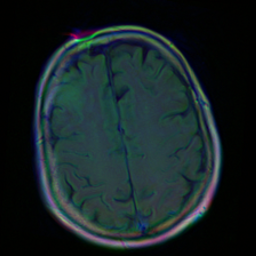

In [ ]:
# Load Image
my_img = cv2.imread("/content/TCGA_FG_6692_20020606_21.tif")
cv2_imshow(my_img)


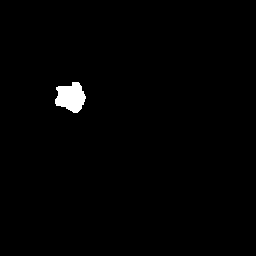

In [ ]:
# Load Image
img = cv2.imread("/content/TCGA_FG_6692_20020606_21_mask.tif")
cv2_imshow(img)


In [ ]:
test_model, inference_config = load_inference_model(1, "/content/drive/MyDrive/MaskRCNN_LOGS/2/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]

Loading weights from  /content/drive/MyDrive/MaskRCNN_LOGS/2/mask_rcnn_object_0005.h5



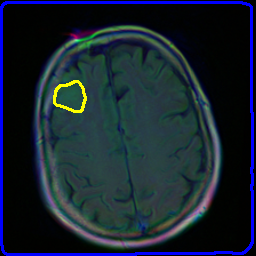

In [ ]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask

# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(my_img, [cnt], True, colors[i], 2)
        img = draw_mask(my_img, [cnt], colors[i])

cv2_imshow(my_img)